## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle as pk
import warnings
warnings.filterwarnings('ignore')

## Data Collection and Pre-processing

Data can be downloaded from [breast_cancer_data](https://www.kaggle.com/code/buddhiniw/breast-cancer-prediction/data)

In [2]:
#Loading data csv file into Pandas Dataframe
cancer_data = pd.read_csv('/content/breast_cancer_data.csv')

In [3]:
#Printing top five rows of the data
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Number of rows and columns
cancer_data.shape

(569, 33)

In [5]:
#Getting some informations about the data
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#Removing id column from the data
cancer_data.drop('id',axis=1, inplace=True)

In [7]:
#Checking for missing values
cancer_data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [8]:
#Removing column with missing values
cancer_data.dropna(axis=1, inplace=True)

In [9]:
#Printing last five rows of the data
cancer_data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [10]:
#Statistical measures about the data
cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


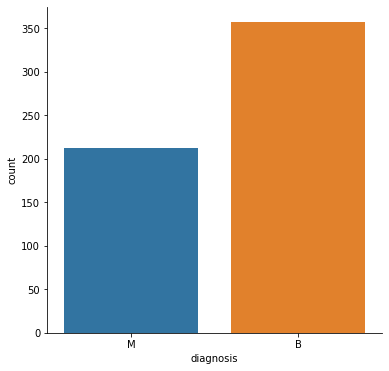

In [11]:
#Checking the distribution of target variable
plot = plt.figure(figsize=(6,6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
sns.countplot(cancer_data['diagnosis'])
plt.show()


In [12]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

B --> Benign

M --> Malignant

In [13]:
benign = cancer_data[cancer_data.diagnosis=='B']
malignant = cancer_data[cancer_data.diagnosis=='M']

benign= benign.sample(n=212)
equalized_label = pd.concat([benign, malignant])

In [14]:
equalized_label.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
488,B,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,...,13.32,21.59,86.57,549.8,0.1526,0.14770,0.1490,0.09815,0.2804,0.08024
550,B,10.86,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.0000,0.00000,0.2458,0.06592
88,B,12.36,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,0.1930,...,13.83,30.50,91.46,574.7,0.1304,0.24630,0.2434,0.12050,0.2972,0.09261
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.31710,0.3662,0.11050,0.2258,0.08004
109,B,11.34,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,...,13.01,29.15,83.99,518.1,0.1699,0.21960,0.3120,0.08278,0.2829,0.08832


In [15]:
equalized_label['diagnosis'].value_counts()

B    212
M    212
Name: diagnosis, dtype: int64

In [16]:
cancer_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
equalized_label.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.062137,18.083491,77.575236,457.090566,0.092727,0.081623,0.047898,0.025651,0.173933,0.06330,...,13.290797,23.726981,86.605425,552.071226,0.125023,0.185884,0.170158,0.074268,0.269946,0.080179
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.06268,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [18]:
#Replacing values in diagnosis column with numerical values
equalized_label.replace({'M':1,'B':0}, inplace=True)

# Model Building
## Seperating Features and Targets

In [19]:
X = equalized_label.drop(['diagnosis'], axis=1)
y = equalized_label['diagnosis']

In [20]:
print(X)
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
488        11.68         16.17           75.49      420.5          0.11280   
550        10.86         21.48           68.51      360.5          0.07431   
88         12.36         21.80           79.78      466.1          0.08772   
558        14.59         22.68           96.39      657.1          0.08473   
109        11.34         21.26           72.48      396.5          0.08759   
..           ...           ...             ...        ...              ...   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   

     compactness_mean  concavity_mean  concave points_mean  sym

## Data Standardization

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
#Saving standard deviation and mean
std = np.sqrt(scaler.var_)
np.save('breast_cancer_std.npy', std)

mean = scaler.mean_
np.save('breast_cancer_mean.npy', mean)

## Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2, stratify=y)

In [24]:
print(X.shape,X_train.shape, X_test.shape)

(424, 30) (339, 30) (85, 30)


### Finding the Optimal Algorithm

In [25]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=2)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.958824
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.929412
2,random_forest,{'n_estimators': 10},0.944118
3,svm,"{'C': 1, 'kernel': 'linear'}",0.958824


In [26]:
# Using cross_val_score for gaining average accuracy
scores = cross_val_score(LogisticRegression(C=1, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 96%


# Model Training

Logistic Regression

In [27]:
#Training Logistics Regression model with training data
classifier = LogisticRegression(C=1)
classifier.fit(X_train, y_train)


LogisticRegression(C=1)

# Model Evaluation

Accuracy score

In [28]:
#Accuracy score on train data
train_data_prediction = classifier.predict(X_train)

train_data_accuracy = accuracy_score(y_train, train_data_prediction)

print("Accuracy score on Train data : {:.2f}% ".format(train_data_accuracy*100))

Accuracy score on Train data : 98.23% 


In [29]:
#Accuracy score on test data
test_data_prediction = classifier.predict(X_test)

test_data_accuracy = accuracy_score(y_test, test_data_prediction)

print("Accuracy score on Test data : {:.2f}% ".format(test_data_accuracy*100))

Accuracy score on Test data : 98.82% 


Confusion Matrix

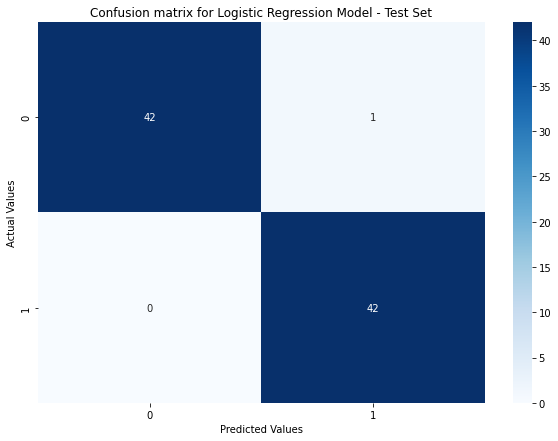

In [30]:
# Creating a confusion matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Building Predictive System

In [31]:
#Creating function for prediction
def cancer_prediction(radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst):
                      

                      parameters = [radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst]
                      for params in parameters:
                        params = float(params)
                      

                      x = [[radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst]]

                      x = scaler.transform(x)
                      
                      return classifier.predict(x)
                        


In [32]:
prediction = cancer_prediction(13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451,0.5835,
                               1.377,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.6,
                               897,0.1654,0.3682,0.2678,0.1556,0.3196,0.1151)[0]
print(prediction)
if prediction:
   print('Oops! You have breast cancer.')
else:
  print("Great! You don't have breast cancer.")

1
Oops! You have breast cancer.


## Saving Trained Model

In [33]:
filename = "breast_cancer_trained_model.pkl"
pk.dump(classifier,open(filename,'wb'))

In [34]:
#Loading Trained model
model = pk.load(open(filename,'rb'))

#Loading standard deviation and mean
std = np.load('breast_cancer_std.npy')
mean = np.load('breast_cancer_mean.npy')

In [35]:
#Creating function for prediction
def cancer_prediction(radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst):
                      

                      parameters = [radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst]
                      for params in parameters:
                        params = float(params)
                      

                      x = [[radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,
                      radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,
                      radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,
                      symmetry_worst,fractal_dimension_worst]]
                      
                      x= (x-mean)/std
                      return model.predict(x)
                        


In [36]:
prediction = cancer_prediction(19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.00615,0.04006,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709,0.1444,0.4245,0.4504,0.243,0.3613,0.08758)[0]
print(prediction)
if prediction:
   print('Oops! You have breast cancer.')
else:
  print("Great! You don't have breast cancer.")

1
Oops! You have breast cancer.


# ...........................THANK YOU............................